### Intialize a data pull from API

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c89176d9-0da0-427a-8739-6dcd26298353',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e) 

{'status': {'timestamp': '2022-06-28T18:40:05.979Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9967}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9589, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [3]:
type(data)

dict

### Create a df from retrieved data and normalize JSON 

In [4]:
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df1 = pd.json_normalize(data['data'])
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.907962e+07,1.907962e+07,NaN,1,NaN,NaN,NaN,2022-06-28T18:36:00.000Z,2.030544e+04,2.056528e+10,-2.0755,-1.726899,-2.892055,-4.163644,-30.508269,-47.470445,-57.274428,3.874202e+11,42.3640,4.264143e+11,NaN,2022-06-28T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.213342e+08,1.213342e+08,NaN,2,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1.160285e+03,1.364927e+10,6.2990,-1.835166,-3.740458,0.972009,-35.622746,-58.928697,-66.122699,1.407822e+11,15.3745,1.407822e+11,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.683492e+10,6.861062e+10,NaN,3,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,9.988399e-01,3.962051e+10,0.3727,-0.005366,-0.032311,-0.028803,-0.011542,-0.123735,-0.147805,6.675739e+10,7.2895,6.853103e+10,NaN,2022-06-28T18:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.580261e+10,5.580261e+10,NaN,4,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1.000443e+00,4.119614e+09,2.3725,0.021843,0.015767,0.039296,0.030624,0.069169,0.053464,5.582732e+10,6.0968,5.582732e+10,NaN,2022-06-28T18:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,2.327933e+02,1.024615e+09,18.6485,-1.062197,-1.617315,4.096763,-23.258893,-41.081890,-47.979642,3.800978e+10,4.1498,3.843807e+10,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
5,4687,Binance USD,BUSD,binance-usd,3925,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.740826e+10,1.740826e+10,NaN,6,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1.000602e+00,4.763561e+09,2.9112,-0.138993,0.070551,0.147583,-0.085162,0.143902,-0.051956,1.741874e+10,1.9039,1.741874e+10,NaN,2022-06-28T18:35:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1
6,52,XRP,XRP,xrp,748,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,NaN,2022-06-28T18:36:00.000Z,3.393366e-01,9.929770e+08,0.0539,-0.878443,-4.903749,2.088474,-12.389711,-44.500665,-60.940040,1.640458e+10,1.7938,3.393366e+10,NaN,2022-06-28T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,475,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,NaN,8,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,4.716904e-01,7.204895e+08,-1.6140,-1.683288,-3.673848,-3.944274,-0.547180,-41.777242,-60.985662,1.591438e+10,1.7380,2.122607e+10,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,340,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.427689e+08,5.116169e+08,NaN,9,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,3.582152e+01,1.320615e+09,1.3660,-2.134587,-8.148873,-4.396640,-20.155912,-62.129429,-70.918590,1.227851e+10,1.3420,1.832690e+10,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
9,74,Do

### Clean up scientific notation 

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079625.00000,19079625.00000,NaN,1,NaN,NaN,NaN,2022-06-28T18:36:00.000Z,20305.44218,20565275105.11504,-2.07550,-1.72690,-2.89205,-4.16364,-30.50827,-47.47045,-57.27443,387420222289.27319,42.36400,426414285819.28003,NaN,2022-06-28T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121334211.81150,121334211.81150,NaN,2,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1160.28460,13649268929.64485,6.29900,-1.83517,-3.74046,0.97201,-35.62275,-58.92870,-66.12270,140782217938.44229,15.37450,140782217938.44000,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66834919366.07514,68610622656.73138,NaN,3,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,0.99884,39620511613.13240,0.37270,-0.00537,-0.03231,-0.02880,-0.01154,-0.12373,-0.14780,66757385572.78307,7.28950,68531028907.16000,NaN,2022-06-28T18:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1.00044,4119613889.12322,2.37250,0.02184,0.01577,0.03930,0.03062,0.06917,0.05346,55827324586.52645,6.09680,55827324586.53000,NaN,2022-06-28T18:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,232.79326,1024614576.00440,18.64850,-1.06220,-1.61732,4.09676,-23.25889,-41.08189,-47.97964,38009778514.41483,4.14980,38438068140.59000,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
5,4687,Binance USD,BUSD,binance-usd,3925,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17408263220.19926,17408263220.19926,NaN,6,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1.00060,4763560643.88805,2.91120,-0.13899,0.07055,0.14758,-0.08516,0.14390,-0.05196,17418737428.52565,1.90390,17418737428.53000,NaN,2022-06-28T18:35:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1
6,52,XRP,XRP,xrp,748,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,NaN,2022-06-28T18:36:00.000Z,0.33934,992976957.04797,0.05390,-0.87844,-4.90375,2.08847,-12.38971,-44.50066,-60.94004,16404583943.98514,1.79380,33933660724.69000,NaN,2022-06-28T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,475,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,NaN,8,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,0.47169,720489549.28214,-1.61400,-1.68329,-3.67385,-3.94427,-0.54718,-41.77724,-60.98566,15914375557.83448,1.73800,21226067602.04000,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,340,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,342768925.68426,511616946.14229,NaN,9,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,35.82152,1320614997.57709,1.366

### Clean up the dataframe

In [7]:
# Rename columns
df1.rename(columns = {'quote.USD.percent_change_1h':'1h_percent', 'quote.USD.percent_change_24h':'24h_percent', 'quote.USD.percent_change_7d':'7d_percent', 'quote.USD.percent_change_30d':'30d_percent', 'quote.USD.percent_change_60d':'60d_percent', 'quote.USD.percent_change_90d':'90d_percent'}, inplace=True)
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079625.00000,19079625.00000,NaN,1,NaN,NaN,NaN,2022-06-28T18:36:00.000Z,20305.44218,20565275105.11504,-2.07550,-1.72690,-2.89205,-4.16364,-30.50827,-47.47045,-57.27443,387420222289.27319,42.36400,426414285819.28003,NaN,2022-06-28T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121334211.81150,121334211.81150,NaN,2,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1160.28460,13649268929.64485,6.29900,-1.83517,-3.74046,0.97201,-35.62275,-58.92870,-66.12270,140782217938.44229,15.37450,140782217938.44000,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66834919366.07514,68610622656.73138,NaN,3,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,0.99884,39620511613.13240,0.37270,-0.00537,-0.03231,-0.02880,-0.01154,-0.12373,-0.14780,66757385572.78307,7.28950,68531028907.16000,NaN,2022-06-28T18:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1.00044,4119613889.12322,2.37250,0.02184,0.01577,0.03930,0.03062,0.06917,0.05346,55827324586.52645,6.09680,55827324586.53000,NaN,2022-06-28T18:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,232.79326,1024614576.00440,18.64850,-1.06220,-1.61732,4.09676,-23.25889,-41.08189,-47.97964,38009778514.41483,4.14980,38438068140.59000,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
5,4687,Binance USD,BUSD,binance-usd,3925,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17408263220.19926,17408263220.19926,NaN,6,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,1.00060,4763560643.88805,2.91120,-0.13899,0.07055,0.14758,-0.08516,0.14390,-0.05196,17418737428.52565,1.90390,17418737428.53000,NaN,2022-06-28T18:35:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1
6,52,XRP,XRP,xrp,748,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,NaN,2022-06-28T18:36:00.000Z,0.33934,992976957.04797,0.05390,-0.87844,-4.90375,2.08847,-12.38971,-44.50066,-60.94004,16404583943.98514,1.79380,33933660724.69000,NaN,2022-06-28T18:36:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,475,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,NaN,8,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,0.47169,720489549.28214,-1.61400,-1.68329,-3.67385,-3.94427,-0.54718,-41.77724,-60.98566,15914375557.83448,1.73800,21226067602.04000,NaN,2022-06-28T18:35:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,340,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,342768925.68426,511616946.14229,NaN,9,NaN,NaN,NaN,2022-06-28T18:35:00.000Z,35.82152,1320614997.57709,1.36600,-2.13459,-8.14887,-4.39664,-20.15591,-62.12943,-70.91859,12278505455.80523,1.34200,18326898950.8000

In [8]:
#Drop columns 
df1 = df1.drop(columns=['platform', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'quote.USD.tvl', 'platform.id','platform.name', 'platform.symbol', 'platform.slug', 'platform.token_address'])
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079625.00000,19079625.00000,1,2022-06-28T18:36:00.000Z,20305.44218,20565275105.11504,-2.07550,-1.72690,-2.89205,-4.16364,-30.50827,-47.47045,-57.27443,387420222289.27319,42.36400,426414285819.28003,2022-06-28T18:36:00.000Z
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121334211.81150,121334211.81150,2,2022-06-28T18:35:00.000Z,1160.28460,13649268929.64485,6.29900,-1.83517,-3.74046,0.97201,-35.62275,-58.92870,-66.12270,140782217938.44229,15.37450,140782217938.44000,2022-06-28T18:35:00.000Z
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66834919366.07514,68610622656.73138,3,2022-06-28T18:35:00.000Z,0.99884,39620511613.13240,0.37270,-0.00537,-0.03231,-0.02880,-0.01154,-0.12373,-0.14780,66757385572.78307,7.28950,68531028907.16000,2022-06-28T18:35:00.000Z
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,4,2022-06-28T18:35:00.000Z,1.00044,4119613889.12322,2.37250,0.02184,0.01577,0.03930,0.03062,0.06917,0.05346,55827324586.52645,6.09680,55827324586.53000,2022-06-28T18:35:00.000Z
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,5,2022-06-28T18:35:00.000Z,232.79326,1024614576.00440,18.64850,-1.06220,-1.61732,4.09676,-23.25889,-41.08189,-47.97964,38009778514.41483,4.14980,38438068140.59000,2022-06-28T18:35:00.000Z
5,4687,Binance USD,BUSD,binance-usd,3925,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17408263220.19926,17408263220.19926,6,2022-06-28T18:35:00.000Z,1.00060,4763560643.88805,2.91120,-0.13899,0.07055,0.14758,-0.08516,0.14390,-0.05196,17418737428.52565,1.90390,17418737428.53000,2022-06-28T18:35:00.000Z
6,52,XRP,XRP,xrp,748,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,7,2022-06-28T18:36:00.000Z,0.33934,992976957.04797,0.05390,-0.87844,-4.90375,2.08847,-12.38971,-44.50066,-60.94004,16404583943.98514,1.79380,33933660724.69000,2022-06-28T18:36:00.000Z
7,2010,Cardano,ADA,cardano,475,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,8,2022-06-28T18:35:00.000Z,0.47169,720489549.28214,-1.61400,-1.68329,-3.67385,-3.94427,-0.54718,-41.77724,-60.98566,15914375557.83448,1.73800,21226067602.04000,2022-06-28T18:35:00.000Z
8,5426,Solana,SOL,solana,340,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,342768925.68426,511616946.14229,9,2022-06-28T18:35:00.000Z,35.82152,1320614997.57709,1.36600,-2.13459,-8.14887,-4.39664,-20.15591,-62.12943,-70.91859,12278505455.80523,1.34200,18326898950.80000,2022-06-28T18:35:00.000Z
9,74,Dogecoin,DOGE,dogecoin,491,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,10,2022-06-28T18:35:00.000Z,0.06761,528919741.86499,-51.31340,-1.96551,-7.02950,1.84234,-17.64637,-50.69090,-53.02449,8969289620.74579,0.97920,8969289620.75000,2022-06-28T18:35:00.000Z


In [ ]:
#Remove/replace NaN values as empty strings

In [9]:
import numpy as np
df1 = df1.replace(np.nan, '', regex=True)
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079625.00000,19079625.00000,1,2022-06-28T18:36:00.000Z,20305.44218,20565275105.11504,-2.07550,-1.72690,-2.89205,-4.16364,-30.50827,-47.47045,-57.27443,387420222289.27319,42.36400,426414285819.28003,2022-06-28T18:36:00.000Z
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",,121334211.81150,121334211.81150,2,2022-06-28T18:35:00.000Z,1160.28460,13649268929.64485,6.29900,-1.83517,-3.74046,0.97201,-35.62275,-58.92870,-66.12270,140782217938.44229,15.37450,140782217938.44000,2022-06-28T18:35:00.000Z
2,825,Tether,USDT,tether,35250,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",,66834919366.07514,68610622656.73138,3,2022-06-28T18:35:00.000Z,0.99884,39620511613.13240,0.37270,-0.00537,-0.03231,-0.02880,-0.01154,-0.12373,-0.14780,66757385572.78307,7.28950,68531028907.16000,2022-06-28T18:35:00.000Z
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",,55802605112.71548,55802605112.71548,4,2022-06-28T18:35:00.000Z,1.00044,4119613889.12322,2.37250,0.02184,0.01577,0.03930,0.03062,0.06917,0.05346,55827324586.52645,6.09680,55827324586.53000,2022-06-28T18:35:00.000Z
4,1839,BNB,BNB,bnb,981,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,5,2022-06-28T18:35:00.000Z,232.79326,1024614576.00440,18.64850,-1.06220,-1.61732,4.09676,-23.25889,-41.08189,-47.97964,38009778514.41483,4.14980,38438068140.59000,2022-06-28T18:35:00.000Z
5,4687,Binance USD,BUSD,binance-usd,3925,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",,17408263220.19926,17408263220.19926,6,2022-06-28T18:35:00.000Z,1.00060,4763560643.88805,2.91120,-0.13899,0.07055,0.14758,-0.08516,0.14390,-0.05196,17418737428.52565,1.90390,17418737428.53000,2022-06-28T18:35:00.000Z
6,52,XRP,XRP,xrp,748,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,7,2022-06-28T18:36:00.000Z,0.33934,992976957.04797,0.05390,-0.87844,-4.90375,2.08847,-12.38971,-44.50066,-60.94004,16404583943.98514,1.79380,33933660724.69000,2022-06-28T18:36:00.000Z
7,2010,Cardano,ADA,cardano,475,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,8,2022-06-28T18:35:00.000Z,0.47169,720489549.28214,-1.61400,-1.68329,-3.67385,-3.94427,-0.54718,-41.77724,-60.98566,15914375557.83448,1.73800,21226067602.04000,2022-06-28T18:35:00.000Z
8,5426,Solana,SOL,solana,340,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",,342768925.68426,511616946.14229,9,2022-06-28T18:35:00.000Z,35.82152,1320614997.57709,1.36600,-2.13459,-8.14887,-4.39664,-20.15591,-62.12943,-70.91859,12278505455.80523,1.34200,18326898950.80000,2022-06-28T18:35:00.000Z
9,74,Dogecoin,DOGE,dogecoin,491,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",,132670764299.89409,132670764299.89409,10,2022-06-28T18:35:00.000Z,0.06761,528919741.86499,-51.31340,-1.96551,-7.02950,1.84234,-17.64637,-50.69090,-53.02449,8969289620.74579,0.97920,8969289620.75000,2022-06-28T18:35:00.000Z


In [ ]:
#Clean up DateTime values

In [10]:
df1['date_added'] = pd.to_datetime(df1['date_added'])
df1['date_added'] = df1['date_added'].dt.date
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079625.00000,19079625.00000,1,2022-06-28T18:36:00.000Z,20305.44218,20565275105.11504,-2.07550,-1.72690,-2.89205,-4.16364,-30.50827,-47.47045,-57.27443,387420222289.27319,42.36400,426414285819.28003,2022-06-28T18:36:00.000Z
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",,121334211.81150,121334211.81150,2,2022-06-28T18:35:00.000Z,1160.28460,13649268929.64485,6.29900,-1.83517,-3.74046,0.97201,-35.62275,-58.92870,-66.12270,140782217938.44229,15.37450,140782217938.44000,2022-06-28T18:35:00.000Z
2,825,Tether,USDT,tether,35250,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",,66834919366.07514,68610622656.73138,3,2022-06-28T18:35:00.000Z,0.99884,39620511613.13240,0.37270,-0.00537,-0.03231,-0.02880,-0.01154,-0.12373,-0.14780,66757385572.78307,7.28950,68531028907.16000,2022-06-28T18:35:00.000Z
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",,55802605112.71548,55802605112.71548,4,2022-06-28T18:35:00.000Z,1.00044,4119613889.12322,2.37250,0.02184,0.01577,0.03930,0.03062,0.06917,0.05346,55827324586.52645,6.09680,55827324586.53000,2022-06-28T18:35:00.000Z
4,1839,BNB,BNB,bnb,981,2017-07-25,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,5,2022-06-28T18:35:00.000Z,232.79326,1024614576.00440,18.64850,-1.06220,-1.61732,4.09676,-23.25889,-41.08189,-47.97964,38009778514.41483,4.14980,38438068140.59000,2022-06-28T18:35:00.000Z
5,4687,Binance USD,BUSD,binance-usd,3925,2019-09-20,"[stablecoin, asset-backed-stablecoin, binance-...",,17408263220.19926,17408263220.19926,6,2022-06-28T18:35:00.000Z,1.00060,4763560643.88805,2.91120,-0.13899,0.07055,0.14758,-0.08516,0.14390,-0.05196,17418737428.52565,1.90390,17418737428.53000,2022-06-28T18:35:00.000Z
6,52,XRP,XRP,xrp,748,2013-08-04,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,7,2022-06-28T18:36:00.000Z,0.33934,992976957.04797,0.05390,-0.87844,-4.90375,2.08847,-12.38971,-44.50066,-60.94004,16404583943.98514,1.79380,33933660724.69000,2022-06-28T18:36:00.000Z
7,2010,Cardano,ADA,cardano,475,2017-10-01,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,8,2022-06-28T18:35:00.000Z,0.47169,720489549.28214,-1.61400,-1.68329,-3.67385,-3.94427,-0.54718,-41.77724,-60.98566,15914375557.83448,1.73800,21226067602.04000,2022-06-28T18:35:00.000Z
8,5426,Solana,SOL,solana,340,2020-04-10,"[pos, platform, solana-ecosystem, cms-holdings...",,342768925.68426,511616946.14229,9,2022-06-28T18:35:00.000Z,35.82152,1320614997.57709,1.36600,-2.13459,-8.14887,-4.39664,-20.15591,-62.12943,-70.91859,12278505455.80523,1.34200,18326898950.80000,2022-06-28T18:35:00.000Z
9,74,Dogecoin,DOGE,dogecoin,491,2013-12-15,"[mineable, pow, scrypt, medium-of-exchange, me...",,132670764299.89409,132670764299.89409,10,2022-06-28T18:35:00.000Z,0.06761,528919741.86499,-51.31340,-1.96551,-7.02950,1.84234,-17.64637,-50.69090,-53.02449,8969289620.74579,0.97920,8969289620.75000,2022-06-28T18:35:00.000Z


### Create a dataframe of Top 10 Cryptos by Marketcaps 

In [51]:
Top10 = df1[:10]
Top10

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,cmc_rank,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h_percent,24h_percent,7d_percent,30d_percent,60d_percent,90d_percent,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9589,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19079625.00000,19079625.00000,1,2022-06-28T18:36:00.000Z,20305.44218,20565275105.11504,-2.07550,-1.72690,-2.89205,-4.16364,-30.50827,-47.47045,-57.27443,387420222289.27319,42.36400,426414285819.28003,2022-06-28T18:36:00.000Z
1,1027,Ethereum,ETH,ethereum,5787,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",,121334211.81150,121334211.81150,2,2022-06-28T18:35:00.000Z,1160.28460,13649268929.64485,6.29900,-1.83517,-3.74046,0.97201,-35.62275,-58.92870,-66.12270,140782217938.44229,15.37450,140782217938.44000,2022-06-28T18:35:00.000Z
2,825,Tether,USDT,tether,35250,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",,66834919366.07514,68610622656.73138,3,2022-06-28T18:35:00.000Z,0.99884,39620511613.13240,0.37270,-0.00537,-0.03231,-0.02880,-0.01154,-0.12373,-0.14780,66757385572.78307,7.28950,68531028907.16000,2022-06-28T18:35:00.000Z
3,3408,USD Coin,USDC,usd-coin,4695,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",,55802605112.71548,55802605112.71548,4,2022-06-28T18:35:00.000Z,1.00044,4119613889.12322,2.37250,0.02184,0.01577,0.03930,0.03062,0.06917,0.05346,55827324586.52645,6.09680,55827324586.53000,2022-06-28T18:35:00.000Z
4,1839,BNB,BNB,bnb,981,2017-07-25,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,5,2022-06-28T18:35:00.000Z,232.79326,1024614576.00440,18.64850,-1.06220,-1.61732,4.09676,-23.25889,-41.08189,-47.97964,38009778514.41483,4.14980,38438068140.59000,2022-06-28T18:35:00.000Z
5,4687,Binance USD,BUSD,binance-usd,3925,2019-09-20,"[stablecoin, asset-backed-stablecoin, binance-...",,17408263220.19926,17408263220.19926,6,2022-06-28T18:35:00.000Z,1.00060,4763560643.88805,2.91120,-0.13899,0.07055,0.14758,-0.08516,0.14390,-0.05196,17418737428.52565,1.90390,17418737428.53000,2022-06-28T18:35:00.000Z
6,52,XRP,XRP,xrp,748,2013-08-04,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,7,2022-06-28T18:36:00.000Z,0.33934,992976957.04797,0.05390,-0.87844,-4.90375,2.08847,-12.38971,-44.50066,-60.94004,16404583943.98514,1.79380,33933660724.69000,2022-06-28T18:36:00.000Z
7,2010,Cardano,ADA,cardano,475,2017-10-01,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,8,2022-06-28T18:35:00.000Z,0.47169,720489549.28214,-1.61400,-1.68329,-3.67385,-3.94427,-0.54718,-41.77724,-60.98566,15914375557.83448,1.73800,21226067602.04000,2022-06-28T18:35:00.000Z
8,5426,Solana,SOL,solana,340,2020-04-10,"[pos, platform, solana-ecosystem, cms-holdings...",,342768925.68426,511616946.14229,9,2022-06-28T18:35:00.000Z,35.82152,1320614997.57709,1.36600,-2.13459,-8.14887,-4.39664,-20.15591,-62.12943,-70.91859,12278505455.80523,1.34200,18326898950.80000,2022-06-28T18:35:00.000Z
9,74,Dogecoin,DOGE,dogecoin,491,2013-12-15,"[mineable, pow, scrypt, medium-of-exchange, me...",,132670764299.89409,132670764299.89409,10,2022-06-28T18:35:00.000Z,0.06761,528919741.86499,-51.31340,-1.96551,-7.02950,1.84234,-17.64637,-50.69090,-53.02449,8969289620.74579,0.97920,8969289620.75000,2022-06-28T18:35:00.000Z


### Visualize Dataframe

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

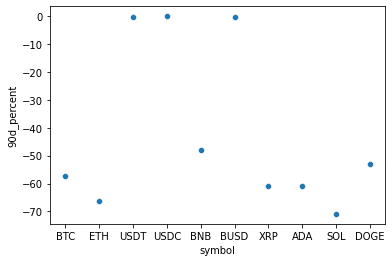

In [12]:
#Visualize 90day drop in the crypto market in top 10 cryptos
df2 = df1[:10]
top_ten = sns.scatterplot(x=df2['symbol'], y=df2['90d_percent'], data=df2)


### Visualize a breakdown of Marketcap of Cryptos in Top 10 range

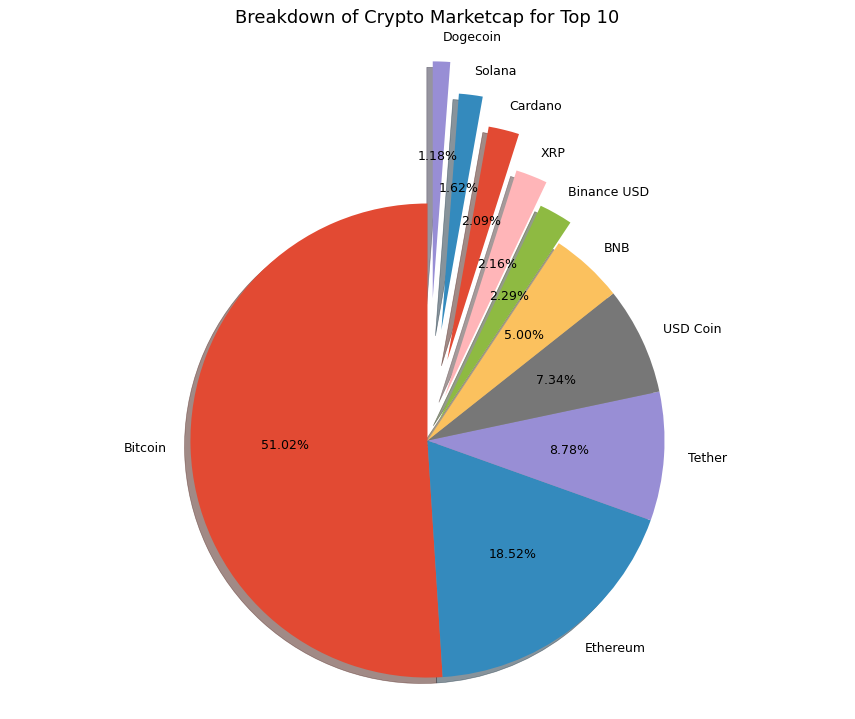

In [76]:
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=90)

labels = Top10['name'] 
market_caps = Top10['quote.USD.market_cap_dominance'] 
explode = (0, 0, 0, 0, 0, 0.1, 0.2, 0.35, 0.47, 0.6) 

plt.style.use('ggplot') 
plt.title("Breakdown of Crypto Marketcap for Top 10") 
plt.pie(x=market_caps, explode=explode, labels=labels, autopct='%.2f%%',
       shadow=True, startangle=90)
plt.axis('equal') 
plt.show()

### Visualize the Amount of Market Pairs per Crypto

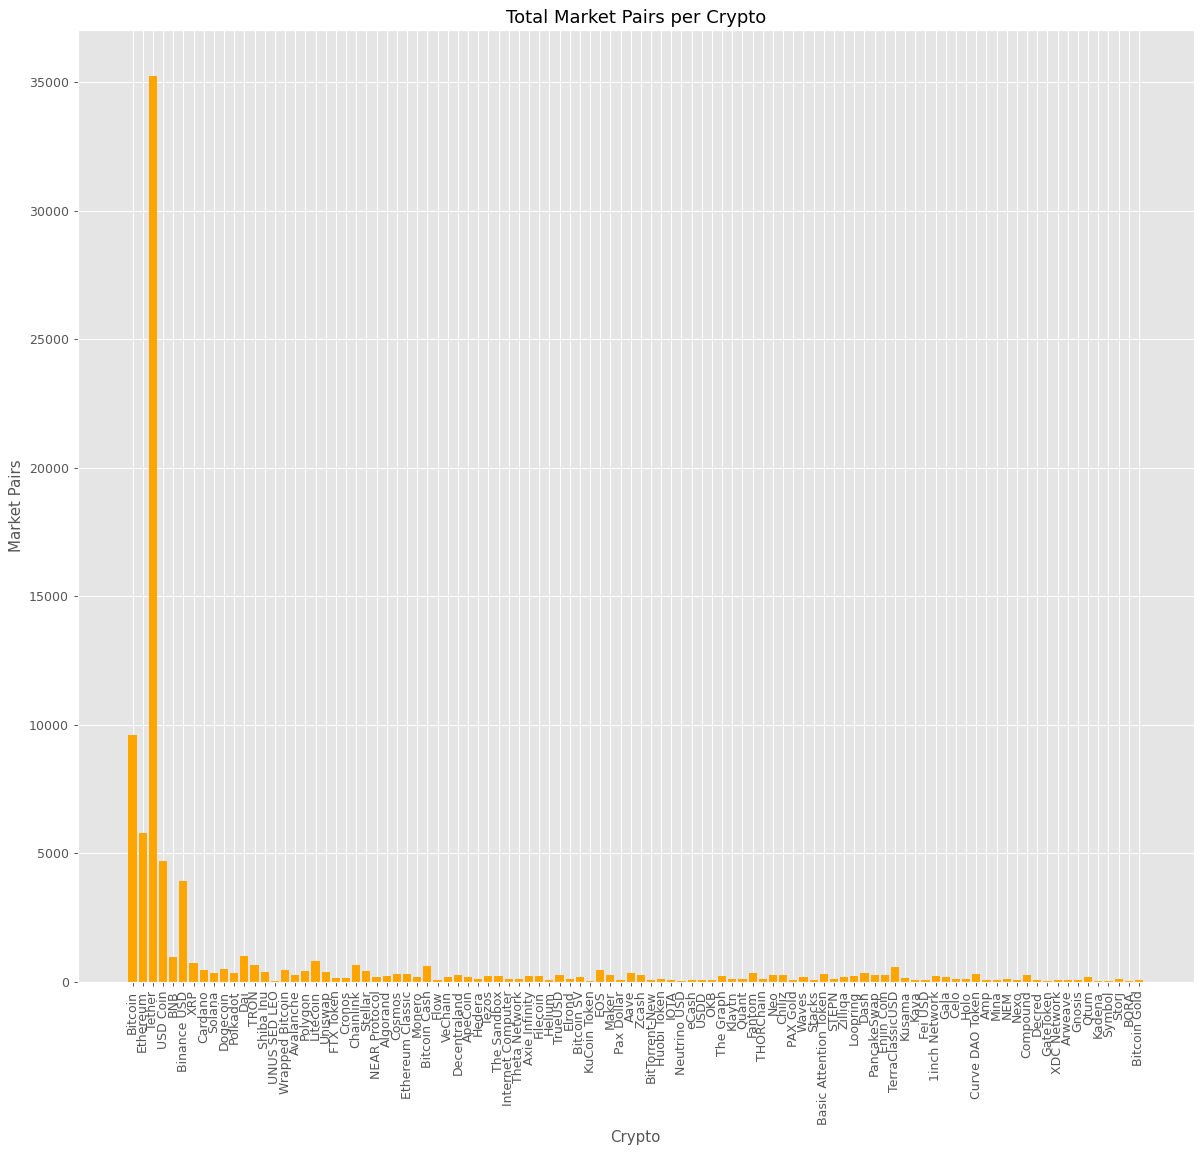

In [77]:
figure(figsize=(16, 14), dpi=90)

x_values = df1['name'] 
y_values = df1['num_market_pairs']
plt.style.use('seaborn-bright') 
plt.bar(x_values, y_values, data= df1, color="orange")

plt.xlabel("Crypto")
plt.xticks(rotation = 90)
plt.ylabel("Market Pairs")
plt.title("Total Market Pairs per Crypto")      
plt.ticklabel_format(axis='y', style='plain', scilimits=None, 
                    useOffset=None, useLocale=True, useMathText=None)
plt.show() 

### Save dataframe to a csv

In [44]:
df1.to_csv('CoinMarketCap_API_PULL.csv')